In [3]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Стили
plt.style.use('dark_background')
plt.rcParams.update({'figure.facecolor':'#2b2b2b',
                     'axes.facecolor':'#3c3c3c',
                     'axes.edgecolor': '#2b2b2b',
                     'grid.alpha': 0.1})

In [167]:
# Считывание данных
data = pd.read_csv("laptop_price.csv")

## Задание 1
* Постройте график
* Назовите график
* Сделайте именование оси x и оси y
* Сделайте выводы

1.1 Изучите количество памяти с помощью matplotlib

In [6]:
# Сводная табличка
ram = data['Ram'].value_counts().sort_values(ascending=False)

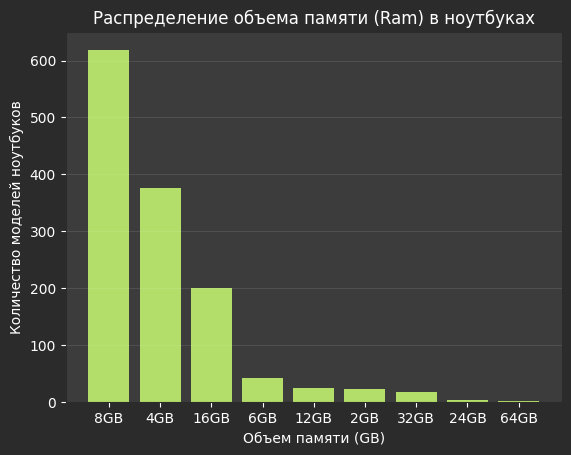

In [7]:
# График через matplotlib.pyplot
plt.bar(ram.index, ram.values, color="C6")
plt.grid(visible = True, axis='y')

plt.title('Распределение объема памяти (Ram) в ноутбуках')
plt.xlabel('Объем памяти (GB)')
plt.ylabel('Количество моделей ноутбуков');

In [ ]:
# График через seaborn
sns.barplot(data=ram, color="C6");

In [ ]:
# График через pandas
ram.plot(kind='bar', color='C6');

1.2 Изучите стоимость ноутбуков с помощью matplotlib

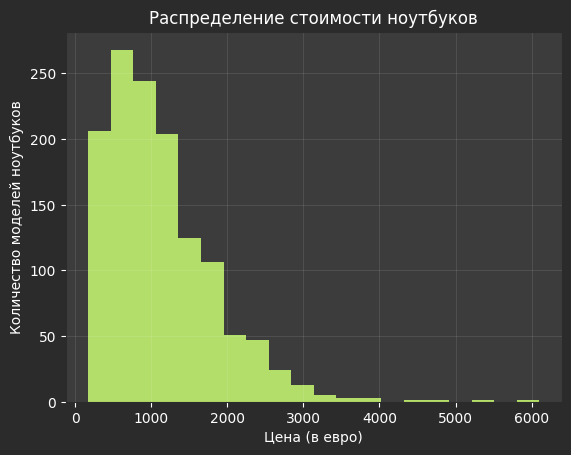

In [8]:
# Сводная табличка
price = data["Price_euros"]

# График
price.hist(color ='C6', bins=20)

# Название графика и именование осей
plt.title('Распределение стоимости ноутбуков')
plt.xlabel('Цена (в евро)')
plt.ylabel('Количество моделей ноутбуков');

1.3 Изучите вес ноутбуков с помощью matplotlib

In [9]:
# Сводная диаграмма
weight = data['Weight'].str.replace('kg', '').astype(float)

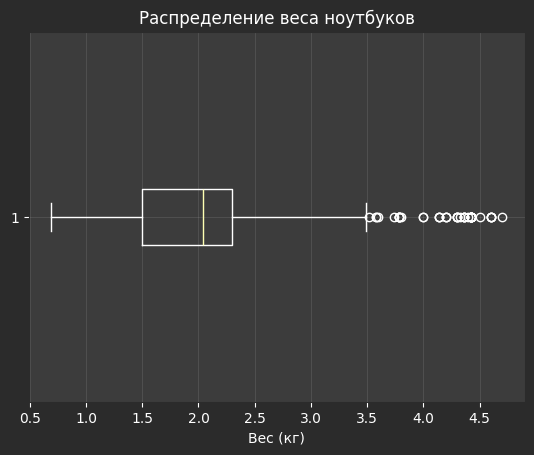

In [10]:
# График
plt.boxplot(weight, vert=False)

# Название графика и именование осей
plt.title('Распределение веса ноутбуков')
plt.xlabel('Вес (кг)')
plt.grid(True)

## Задание 2
2.1 Изучите распределение типов носителя

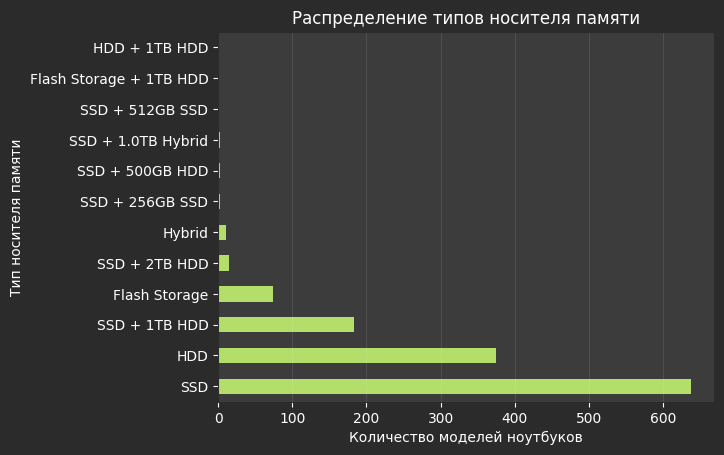

In [11]:
data['Memory_Type'] = data['Memory'].str.split().str[1:].str.join(' ')

# Подсчет количества ноутбуков для каждого типа носителя памяти (Memory_type)
memory_type_counts = data['Memory_Type'].value_counts()

# Построение графика
memory_type_counts.plot(kind='barh', color='C6')

# Название графика и именование осей
plt.title('Распределение типов носителя памяти')
plt.xlabel('Количество моделей ноутбуков')
plt.ylabel('Тип носителя памяти')
plt.grid(visible = True, axis='x')

2.2 Изучите распределение компаний производителей

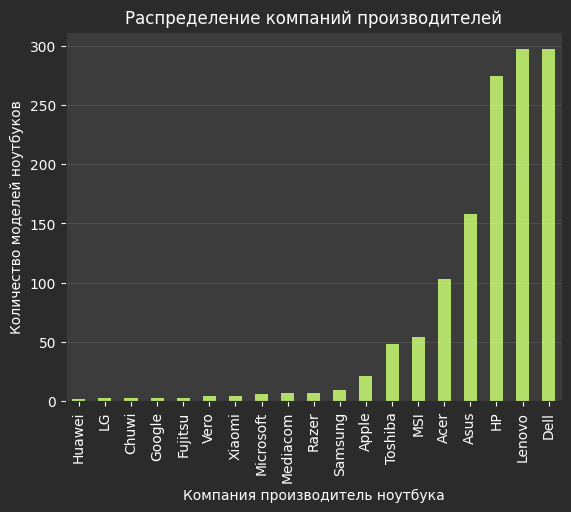

In [12]:
cpu_company = data.groupby("Company")["Product"].count().sort_values()

# График
cpu_company.plot(kind='bar', color='C6')
plt.grid(visible = True, axis='y')


# Название графика и именование осей
plt.title('Распределение компаний производителей')
plt.xlabel('Компания производитель ноутбука')
plt.ylabel('Количество моделей ноутбуков');


2.3 Изучите распределение операционной системы

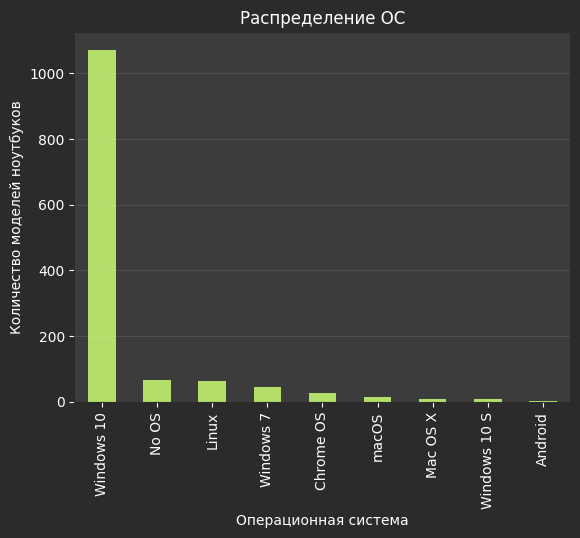

In [13]:
cpu_company = data.groupby("OpSys")["Product"].count().sort_values(ascending = False)
# График
cpu_company.plot(kind='bar', color='C6')
plt.grid(visible = True, axis='y')


# Название графика и именование осей
plt.title('Распределение ОС')
plt.xlabel('Операционная система')
plt.ylabel('Количество моделей ноутбуков');

2.4 Изучите распределение компаний производителей CPU
* Постройте график
* Сделайте выводы

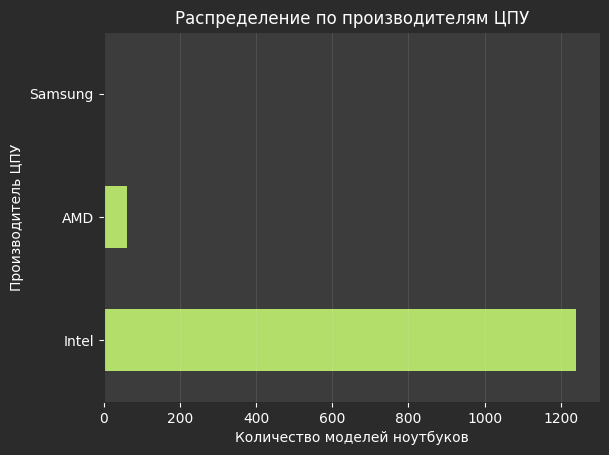

In [14]:
data['Cpu_Company'] = data['Cpu'].str.split().str[0]
cpu_company = data['Cpu_Company'].value_counts()

# График
cpu_company.plot(kind='barh', color='C6')
plt.grid(visible = True, axis='x')


# Название графика и именование осей
plt.title('Распределение по производителям ЦПУ')
plt.xlabel('Количество моделей ноутбуков')
plt.ylabel('Производитель ЦПУ');

## Задание 3
Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму. Процессоры от Samsung не изучайте

3.1 Постройте график в абсолютных величинах

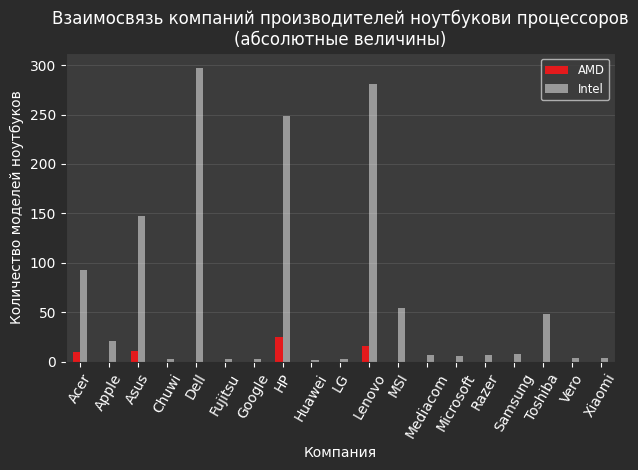

In [153]:
# Сводная таблица
cpu_company = data[data["Cpu_Company"]!="Samsung"].groupby(["Company", "Cpu_Company"])["Product"].count().unstack(fill_value=0)

# Построение графика в абсолютных величинах
cpu_company.plot(kind='bar', cmap='Set1')

# Подписи графика
plt.title('Взаимосвязь компаний производителей ноутбукови процессоров\n(абсолютные величины)')
plt.xlabel('Компания')
plt.ylabel('Количество моделей ноутбуков')
plt.legend(fontsize='small')
plt.grid(visible = True, axis='y')
plt.xticks(rotation=60)
plt.tight_layout()

3.2 Постройте график в относительных величинах

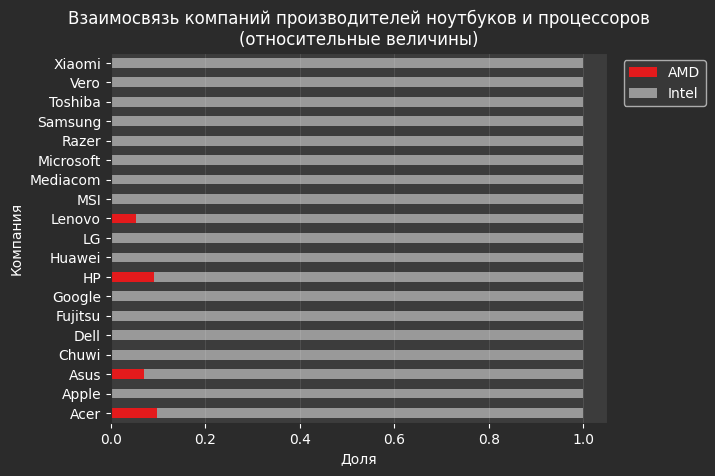

In [152]:
# Преобразование в относительные величины
cpu_company_rel = cpu_company.div(cpu_company.sum(axis=1), axis=0)

# Построение графика в относительных величинах
cpu_company_rel.plot(kind='barh', stacked=True, cmap='Set1')

# Подписи графика
plt.title('Взаимосвязь компаний производителей ноутбуков и процессоров\n(относительные величины)')
plt.xlabel('Доля')
plt.ylabel('Компания')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(visible = True, axis='x')

## Задание 4
4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора

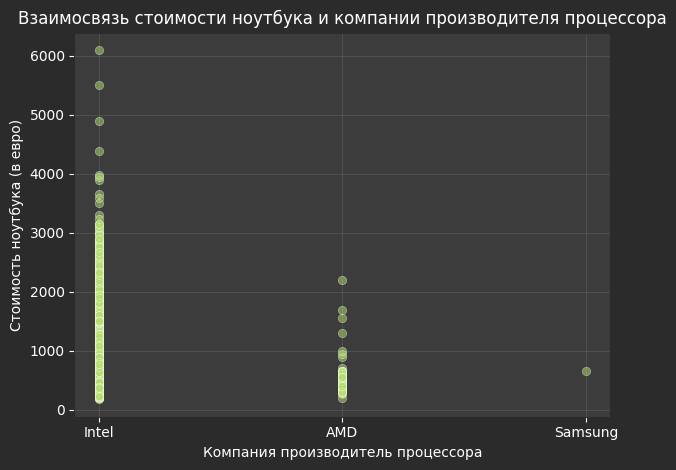

In [169]:
data['Cpu_Company'] = data['Cpu'].str.split().str[0]

# Построение графика
sns.scatterplot(x='Cpu_Company', y='Price_euros', data=data, color='C6', alpha=0.5)
plt.title('Взаимосвязь стоимости ноутбука и компании производителя процессора')
plt.xlabel('Компания производитель процессора')
plt.ylabel('Стоимость ноутбука (в евро)')
plt.grid(True)
plt.tight_layout()

4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти

4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти

4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя
* Постройте график
* Назовите график
* Сделайте именование оси x и оси y
* Сделайте выводы


## Задание 5*
Постройте матрицу корреляций для таблицы

In [173]:
data_cols =['Inches', 'Price_euros']
data[data_cols].corr()

,Inches,Price_euros
Inches,1.000000,0.068197
Price_euros,0.068197,1.000000
